In [1]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
happiness_file = Path("Resources/world_happiness_2016.csv")

In [3]:
happiness_df = pd.read_csv(happiness_file)
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
#Round data
clean_df = happiness_df.round(decimals=2)

clean_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.53,7.46,7.59,1.44,1.16,0.80,0.58,0.44,0.36,2.74
1,Switzerland,Western Europe,2,7.51,7.43,7.59,1.53,1.15,0.86,0.59,0.41,0.28,2.69
2,Iceland,Western Europe,3,7.50,7.33,7.67,1.43,1.18,0.87,0.57,0.15,0.48,2.83
3,Norway,Western Europe,4,7.50,7.42,7.58,1.58,1.13,0.80,0.60,0.36,0.38,2.66
4,Finland,Western Europe,5,7.41,7.35,7.48,1.41,1.13,0.81,0.57,0.41,0.25,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.48,3.40,3.56,0.39,0.10,0.21,0.40,0.07,0.20,2.11
153,Afghanistan,Southern Asia,154,3.36,3.29,3.43,0.38,0.11,0.17,0.16,0.07,0.31,2.15
154,Togo,Sub-Saharan Africa,155,3.30,3.19,3.41,0.28,0.00,0.25,0.35,0.12,0.18,2.14
155,Syria,Middle East and Northern Africa,156,3.07,2.94,3.20,0.75,0.15,0.63,0.07,0.17,0.48,0.82


In [5]:
happiness_df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#Check for duplicate rows
clean_df.duplicated().sum()

0

In [7]:
#Perform summary statistics on Numeric Columns
clean_df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.38242,5.282548,5.481529,0.953567,0.793567,0.557771,0.371338,0.137707,0.242611,2.325732
std,45.466030,1.14154,1.148189,1.136771,0.412784,0.266639,0.229488,0.145131,0.110934,0.133451,0.542025
min,1.000000,2.90000,2.730000,3.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820000
25%,40.000000,4.40000,4.330000,4.460000,0.670000,0.640000,0.380000,0.260000,0.060000,0.150000,2.030000
50%,79.000000,5.31000,5.240000,5.420000,1.030000,0.840000,0.600000,0.400000,0.110000,0.220000,2.290000
75%,118.000000,6.27000,6.150000,6.430000,1.280000,1.020000,0.730000,0.480000,0.180000,0.310000,2.660000
max,157.000000,7.53000,7.460000,7.670000,1.820000,1.180000,0.950000,0.610000,0.510000,0.820000,3.840000


In [8]:
#drop columns and clean data from Happiness_df
new_df = clean_df.copy()
new_df = clean_df.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Dystopia Residual'])
new_df


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.53,1.44,0.80,0.58,0.44,0.36
1,Switzerland,Western Europe,2,7.51,1.53,0.86,0.59,0.41,0.28
2,Iceland,Western Europe,3,7.50,1.43,0.87,0.57,0.15,0.48
3,Norway,Western Europe,4,7.50,1.58,0.80,0.60,0.36,0.38
4,Finland,Western Europe,5,7.41,1.41,0.81,0.57,0.41,0.25
...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.48,0.39,0.21,0.40,0.07,0.20
153,Afghanistan,Southern Asia,154,3.36,0.38,0.17,0.16,0.07,0.31
154,Togo,Sub-Saharan Africa,155,3.30,0.28,0.25,0.35,0.12,0.18
155,Syria,Middle East and Northern Africa,156,3.07,0.75,0.63,0.07,0.17,0.48


In [9]:
#Calculate Average for Region and Happiness scores
average_happiness = clean_df.groupby('Region', as_index =False)['Happiness Score'].mean().round(2)
average_happiness.head(10)


,Region,Happiness Score
0,Australia and New Zealand,7.32
1,Central and Eastern Europe,5.37
2,Eastern Asia,5.62
3,Latin America and Caribbean,6.10
4,Middle East and Northern Africa,5.39
5,North America,7.25
6,Southeastern Asia,5.34
7,Southern Asia,4.56
8,Sub-Saharan Africa,4.14
9,Western Europe,6.69


<Figure size 700x500 with 0 Axes>

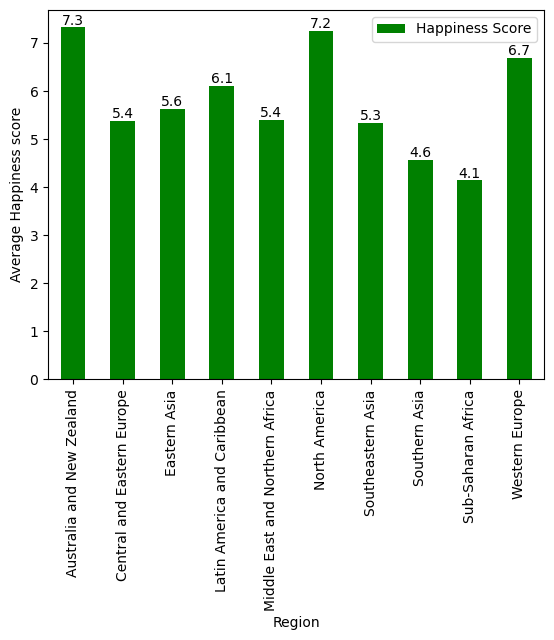

In [10]:
#Bar graph Region and Average Happiness
plt.figure(figsize=(7,5))
ax = average_happiness.plot(x='Region',y='Happiness Score', kind='bar', color=['green'])
plt.ylabel('Average Happiness score')



#add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')




In [11]:
average_happiness_country = clean_df.groupby('Country', as_index =False)['Happiness Score'].mean()
average_happiness_country.head(157)

,Country,Happiness Score
0,Afghanistan,3.36
1,Albania,4.66
2,Algeria,6.36
3,Angola,3.87
4,Argentina,6.65
...,...,...
152,Venezuela,6.08
153,Vietnam,5.06
154,Yemen,3.72
155,Zambia,4.80


In [12]:
average_freedom_country = clean_df.groupby(['Country', 'Happiness Rank'])['Freedom'].mean().reset_index()
average_freedom_country.sort_values(by=["Freedom"], ascending = False)

#you can do .mean or .sum because its sorted by country so mean = sum

,Country,Happiness Rank,Freedom
151,Uzbekistan,49,0.61
103,Norway,4,0.60
23,Cambodia,140,0.59
134,Switzerland,2,0.59
98,New Zealand,8,0.58
...,...,...,...
135,Syria,156,0.07
50,Greece,99,0.06
22,Burundi,157,0.04
3,Angola,141,0.01


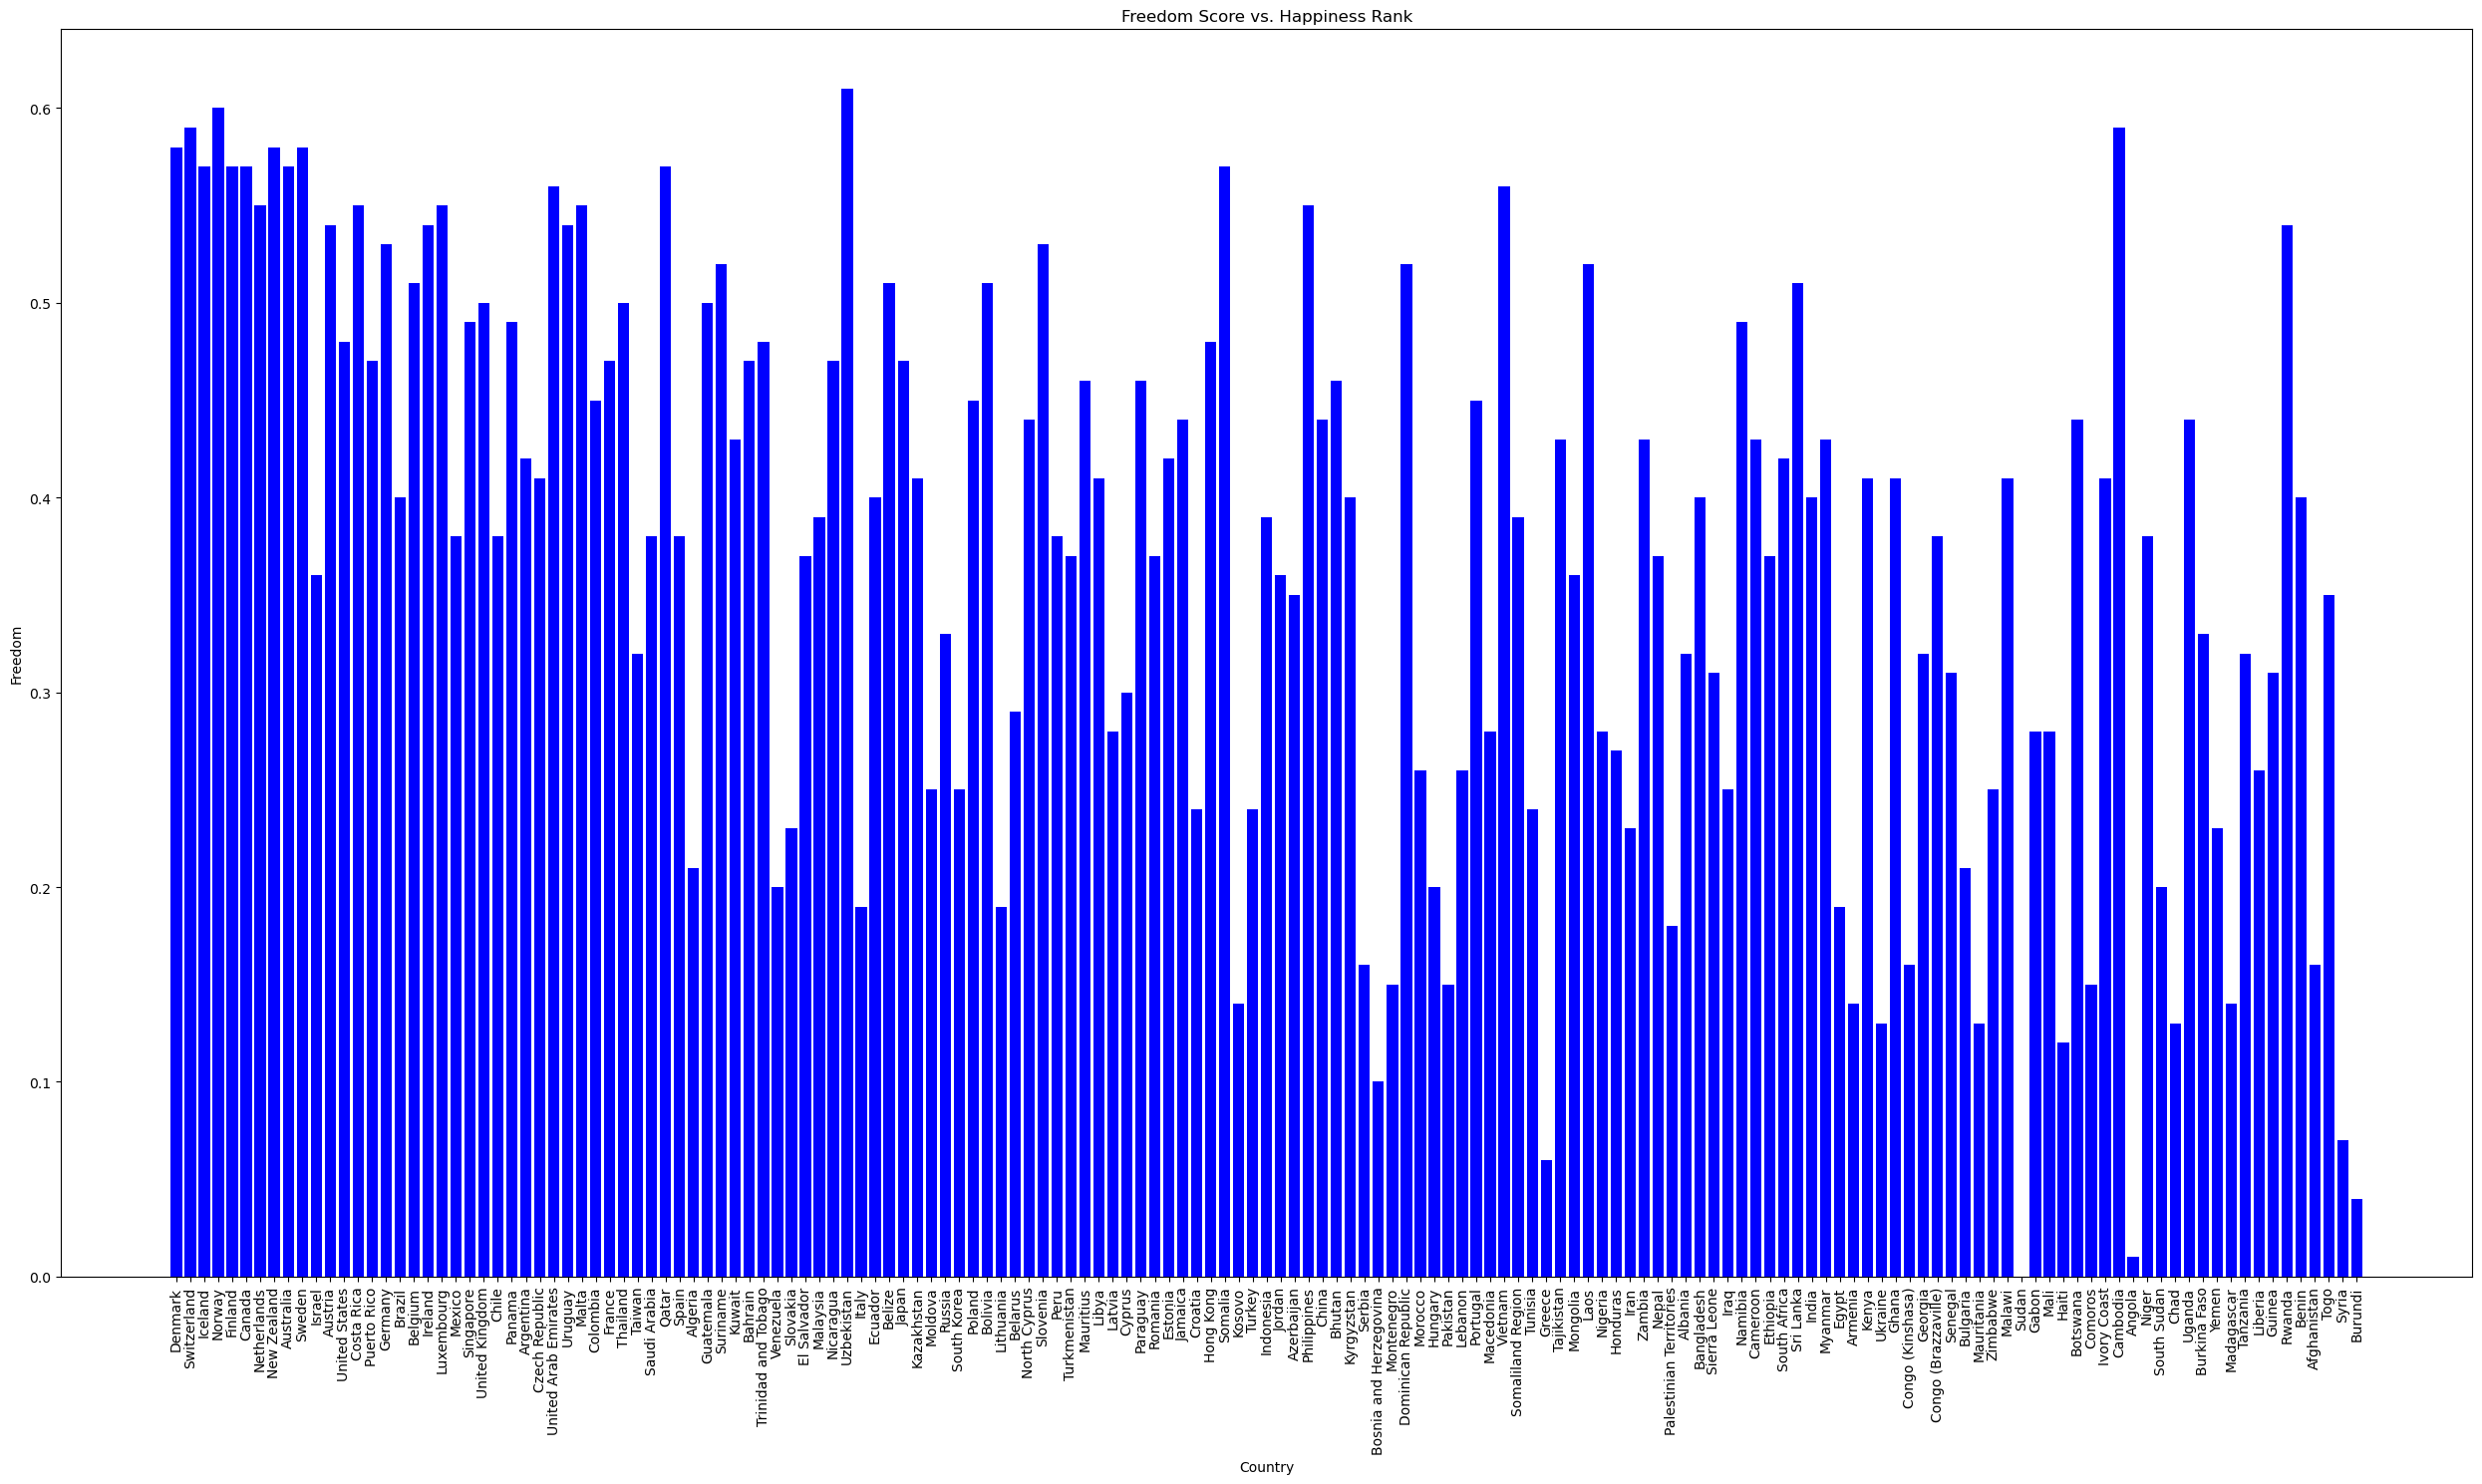

In [107]:
#We sort each bar by country happiness rank so Denmark(#1) is happiest and Burundi(#157) is saddest. Each bar represents countrys freedom score.

plt.figure(figsize=(25, 15))
average_freedom_country = average_freedom_country.sort_values("Happiness Rank")
plt.bar(average_freedom_country['Country'], average_freedom_country['Freedom'], color='Blue')
plt.xlabel('Country')
plt.ylabel('Freedom')
plt.title('Freedom Score vs. Happiness Rank')
plt.xticks(rotation=90)
plt.tight_layout() 

In [14]:
#() is what you are grouping by

# Happiness and Life Expectancy, grouped by Happiness Score
#happiness_life = clean_df.groupby('Region')[['Happiness Score', 'Health (Life Expectancy)']].mean().reset_index().round(2)
happiness_life = clean_df.groupby('Region')['Health (Life Expectancy)'].mean().reset_index().round(2)
happiness_life.sort_values(["Region"], inplace=True)


happiness_life.head(10)



,Region,Health (Life Expectancy)
0,Australia and New Zealand,0.84
1,Central and Eastern Europe,0.63
2,Eastern Asia,0.81
3,Latin America and Caribbean,0.61
4,Middle East and Northern Africa,0.62
5,North America,0.80
6,Southeastern Asia,0.56
7,Southern Asia,0.45
8,Sub-Saharan Africa,0.24
9,Western Europe,0.83


In [15]:
health_region = ["Australia and New Zealand", "Central and Eastern Europe", "Eastern Asia", "Latin America and Carribean", "Middle Eastern and Northern Africa", "North America", "Southeastern Asia", 
                 "Southern Asia", "Sub-Saharan Africa", "Western Europe"]
health_data = []

for health_region in health_region:
    avg_health = clean_df.loc[clean_df["Region"] ==health_region, "Health (Life Expectancy)"]
    quartiles = avg_health.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
     # Subset
    health_data.append(avg_health)
    
    # Upper & lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

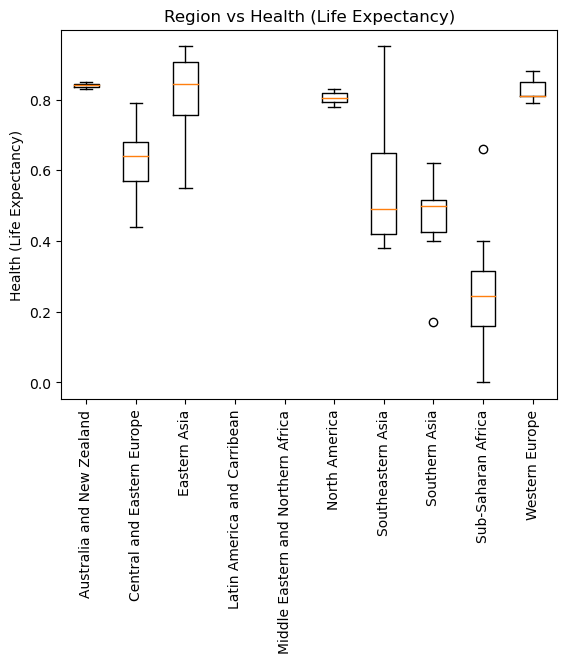

In [16]:
#Generate Box Plot
plt.boxplot(health_data)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["Australia and New Zealand", "Central and Eastern Europe", "Eastern Asia", "Latin America and Carribean", "Middle Eastern and Northern Africa",
                                         "North America", "Southeastern Asia", "Southern Asia", "Sub-Saharan Africa", "Western Europe"], rotation = 90)
plt.title("Region vs Health (Life Expectancy)")
plt.ylabel("Health (Life Expectancy)")
plt.tight_layout
plt.show()

In [17]:
trust_group = clean_df.groupby(['Region', 'Happiness Rank'])['Trust (Government Corruption)'].mean().reset_index().round(2)



trust_group.head(156)

,Region,Happiness Rank,Trust (Government Corruption)
0,Australia and New Zealand,8,0.42
1,Australia and New Zealand,9,0.32
2,Central and Eastern Europe,27,0.04
3,Central and Eastern Europe,45,0.03
4,Central and Eastern Europe,49,0.28
...,...,...,...
151,Western Europe,50,0.03
152,Western Europe,62,0.17
153,Western Europe,69,0.05
154,Western Europe,94,0.02


<Axes: xlabel='Region', ylabel='Trust (Government Corruption)'>

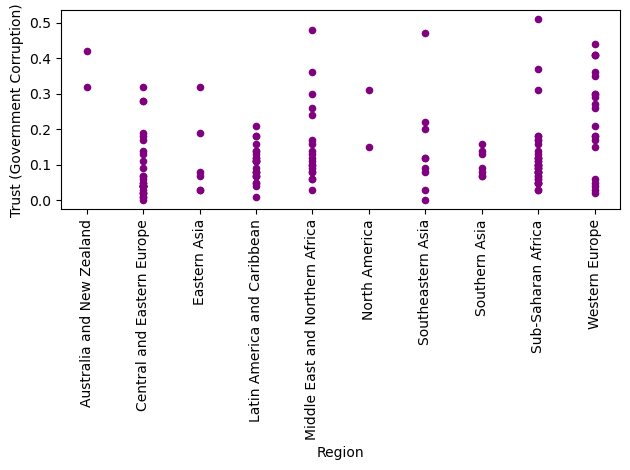

In [108]:
trust_line = trust_group.plot(x='Region',y='Trust (Government Corruption)', kind='scatter', color=['Purple'])
plt.xticks(rotation=90)
plt.tight_layout()

trust_line

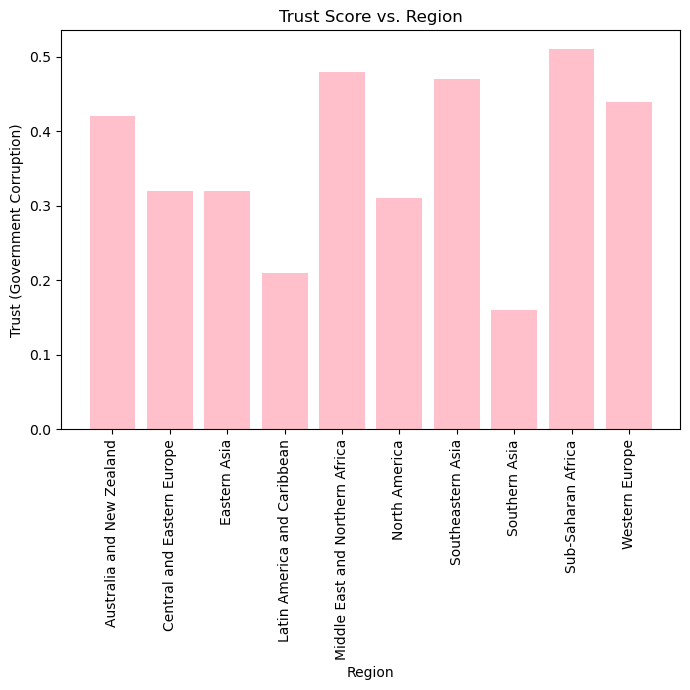

In [105]:
plt.figure(figsize=(7, 7))
trust_line = trust_group.sort_values("Happiness Rank")
plt.bar(trust_group['Region'], trust_group['Trust (Government Corruption)'], color='Pink')
plt.xlabel('Region')
plt.ylabel('Trust (Government Corruption)')
plt.title('Trust Score vs. Region')
plt.xticks(rotation=90)
plt.tight_layout() 

In [101]:
generous_group = clean_df.groupby(['Country', 'Happiness Score'])['Economy (GDP per Capita)'].mean().reset_index().round(2)
generous_group


,Country,Happiness Score,Economy (GDP per Capita)
0,Afghanistan,3.36,0.38
1,Albania,4.66,0.96
2,Algeria,6.36,1.05
3,Angola,3.87,0.85
4,Argentina,6.65,1.15
...,...,...,...
152,Venezuela,6.08,1.13
153,Vietnam,5.06,0.74
154,Yemen,3.72,0.58
155,Zambia,4.80,0.61


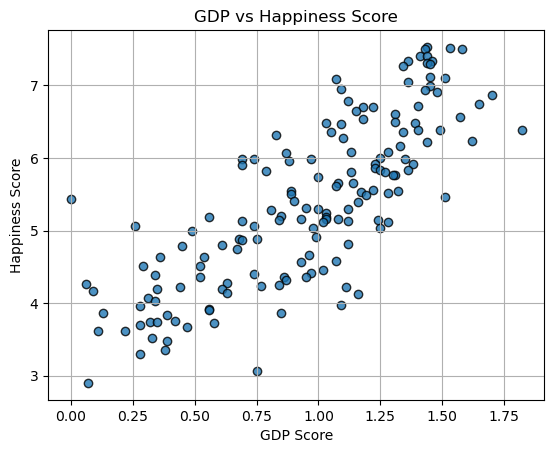

In [94]:
Economy = clean_df["Economy (GDP per Capita)"]
Happiness = clean_df["Happiness Score"]
plt.scatter(Economy,
            Happiness,
            edgecolor="black", linewidths = 1, marker="o",
            alpha=0.8, label="Country")

plt.title(f"GDP vs Happiness Score")
plt.xlabel("GDP Score")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()


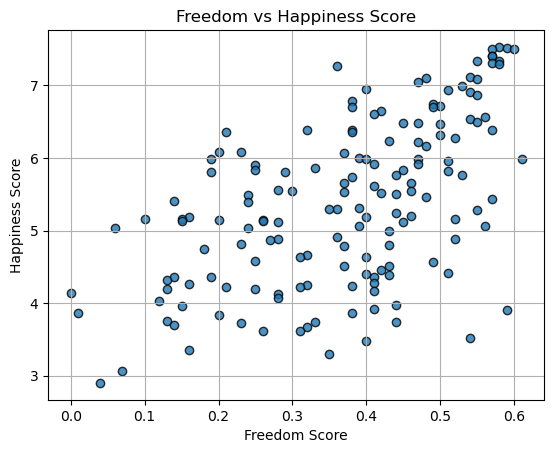

In [109]:
Freedom = clean_df["Freedom"]
Happiness = clean_df["Happiness Score"]
plt.scatter(Freedom,
            Happiness,
            edgecolor="black", linewidths = 1, marker="o",
            alpha=0.8, label="Country")

plt.title(f"Freedom vs Happiness Score")
plt.xlabel("Freedom Score")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()


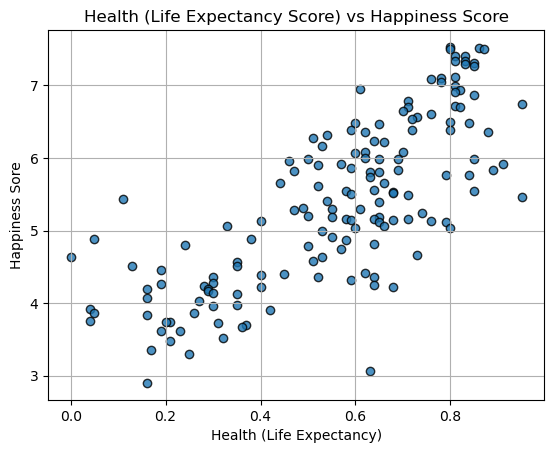

In [118]:
Health = clean_df["Health (Life Expectancy)"]
Happiness = clean_df["Happiness Score"]
plt.scatter(Health,
            Happiness,
            edgecolor="black", linewidths = 1, marker="o",
            alpha=0.8, label="Country")

plt.title(f"Health (Life Expectancy Score) vs Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Sore")
plt.grid(True)
plt.show()


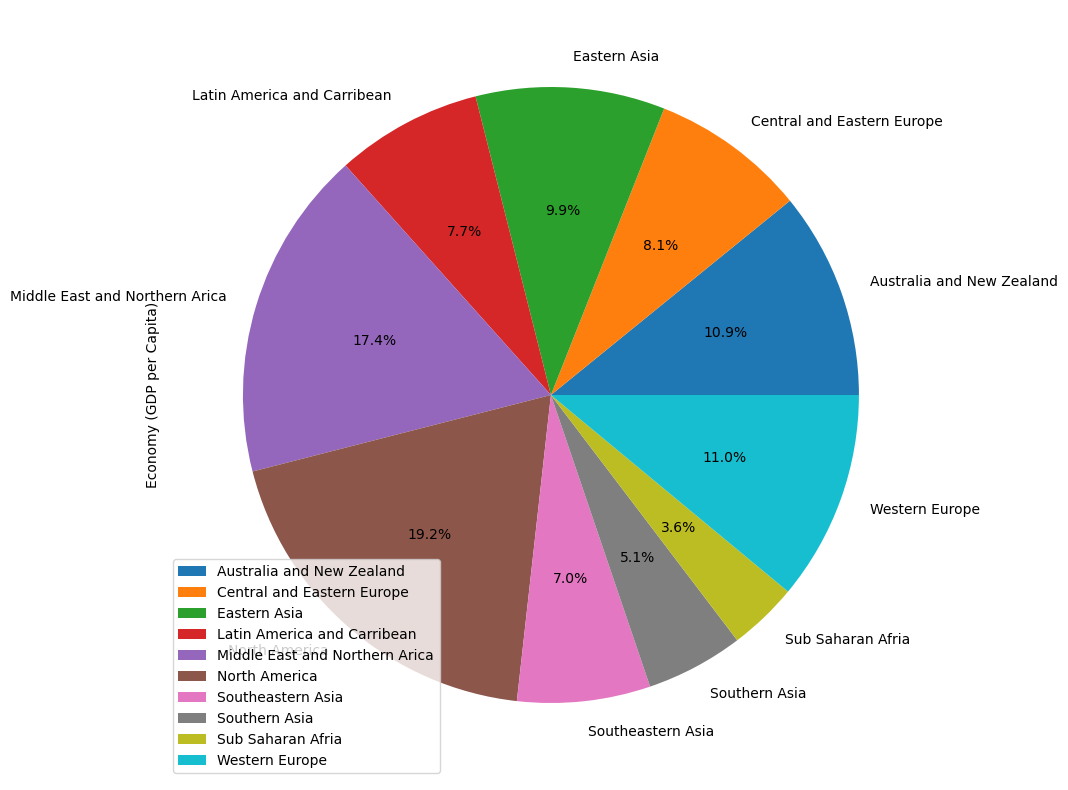

In [90]:
generous_df = pd.DataFrame({'Region': ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Carribean', 'Middle East and Northern Arica', 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub Saharan Afria', 'Western Europe'],        
                            'Economy (GDP per Capita)': [1.40, 1.05, 1.28, 0.99,
                             2.24, 2.48, 0.90, 0.66, 0.47, 1.42]},
                            index=['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Carribean', 'Middle East and Northern Arica' , 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub Saharan Afria', 'Western Europe'])
                            

generous_pie = generous_df.plot.pie(y='Economy (GDP per Capita)', autopct='%1.01f%%', legend=True, figsize=(10,10))